## Traveling Salesman Problem
It's an NP-hard problem. I devised an algorithm where greedy algorithm is used first to obtain a path which is not necessarily the best solution. Then, path-grow method and early stopping criterion are used to get the final answer.
<br>
This is not an efficient algorithm. Just write it for fun.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readCoord():
    # Function to read in coordinates of points
    f = open("tsp.txt")
    n = int(f.readline().strip())
    coord = []
    for i in range(n):
        coord.append([eval(x) for x in f.readline().strip().split()])
    return coord

def distMat(coord):
    # Function to calculate distance matrix in which the ijth element is the 
    # euclidean distance between point i and j
    coord = np.array(coord)
    distM = np.zeros([len(coord),len(coord)])
    for i in range(coord.shape[0]):
        diff = coord - coord[i,:]
        dist = np.sqrt(diff[:,0]**2+diff[:,1]**2)
        distM[i,:] = dist
    return distM

def greedyPath(distM):
    # Function to use greedy algorithm to get a not-so-bad answer as a benchmark.
    # Initially, each single point is a list, choose the closest two points to merge into one list.
    # Recursively find the two lists that have the shortest distance between end points, 
    # merge lists until all points are in one list.
    distM_copy = np.copy(distM)
    for i in range(distM_copy.shape[0]):
        distM_copy[i,:(i+1)] = np.inf
    path_dic = {i:[i] for i in range(distM_copy.shape[0])}
    def getClosePoints(distM):
        min_idx = np.argmin(distM)
        p1 = min_idx // distM.shape[0]
        p2 = min_idx % distM.shape[0]
        return p1, p2
    while len(path_dic) > 2:
        p1, p2 = getClosePoints(distM_copy)
        distM_copy[p1,p2] = np.inf
        distM_copy[path_dic[p1][-1],path_dic[p2][-1]] = np.inf
        distM_copy[path_dic[p2][-1],path_dic[p1][-1]] = np.inf       
        del_p1 = len(path_dic[p1]) > 1
        del_p2 = len(path_dic[p2]) > 1
        temp1 = path_dic[p1][:]
        temp2 = path_dic[p2][:]
        path_dic[path_dic[p1][-1]] += temp2
        path_dic[path_dic[p2][-1]] += temp1
        if del_p1:
            del path_dic[p1]
            distM_copy[p1,:] = np.inf
            distM_copy[:,p1] = np.inf
        if del_p2:
            del path_dic[p2]
            distM_copy[p2,:] = np.inf
            distM_copy[:,p2] = np.inf
    path = list(path_dic.values())[0]
    path.append(path[0])
    path_length = 0
    for i in range(len(path)-1):
        path_length += distM[path[i],path[i+1]]
    return path, path_length

def pathGrow(curr_path, curr_length, remain_point, distM, curr_shortest):
    # Solve Traveling Salesman Problem 
    # Because the path is a circle, the starting point does not matter.
    # Assume the path starts from point 0 and ends at point 0
    # Each time add one point into the path:
    # p0->pi->p0
    # p0->pi->pj->p0
    # p0->pi->pj->pk->p0
    # .....
    # Stop adding points when the path is impossible to be shorter than the current shortest path.
    # Initially, the path length from greedy algorithm is used as the shortest path.
    # When all points are added into the path, update shortest path if necessary, and 
    # go back to try other paths.
    if len(remain_point) == 0:
        return curr_path, curr_length
    path = None
    length = float('inf')
    subDistM = distM[remain_point+curr_path[-2:],:][:,remain_point+curr_path[-2:]]
    subDistArray = subDistM.flatten()
    subDistArray = np.sort(subDistArray[subDistArray > 0])
    subDistArray = subDistArray[::2]
    if curr_length - distM[curr_path[-2],curr_path[-1]] + sum(subDistArray[:(len(remain_point)+1)]) > curr_shortest:
        return path, length
    for p in remain_point:
        path_add1 = curr_path[:-1] + [p] + curr_path[-1:]
        length_add1 = curr_length + distM[curr_path[-2],p] + distM[p,curr_path[-1]] - \
                        distM[curr_path[-2],curr_path[-1]]
        if length_add1 > curr_shortest:
            continue
        remain_point_next = remain_point[:]
        remain_point_next.remove(p)
        t_path,t_length = pathGrow(path_add1, length_add1, remain_point_next, distM, curr_shortest)
        if t_length < curr_shortest:
            path = t_path
            length = t_length
            curr_shortest = t_length
    return path, length

In [3]:
# read coordinates
coord = readCoord()
# get distance matrix
distM = distMat(coord)
# get a benchmark path by greedy algorithm 
g_path, g_length = greedyPath(distM)

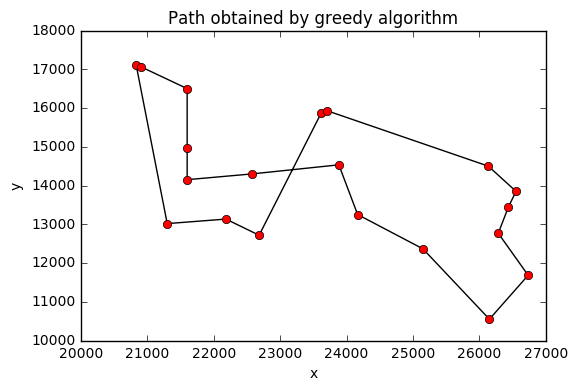

In [4]:
x = [p[0] for p in coord]
y = [p[1] for p in coord]
pathx = [x[i] for i in g_path]
pathy = [y[i] for i in g_path]
plt.plot(pathx, pathy, "k")
plt.plot(x, y, "ro")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Path obtained by greedy algorithm')
plt.show()

In [5]:
%time path, length = pathGrow([0,0], 0, list(range(1,len(coord))), distM, g_length)

CPU times: user 3min 50s, sys: 328 ms, total: 3min 50s
Wall time: 3min 51s


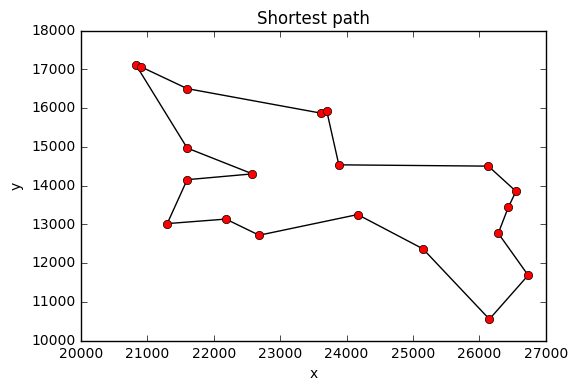

In [6]:
pathx = [x[i] for i in path]
pathy = [y[i] for i in path]
plt.plot(pathx, pathy, "k")
plt.plot(x, y, "ro")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shortest path')
plt.show()